In [1]:


%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)
import os

In [2]:
# https://www.kaggle.com/datasets/hemanthpingali/phishing-url
df = pd.read_parquet(r'C:\Users\Marcel\Desktop\Projekt\archive\Training.parquet')
df.head()

url  length_url  \
0  https://www.todayshomeowner.com/how-to-make-ho...          82   
1  http://thapthan.ac.th/information/confirmation...          93   
2  http://app.dialoginsight.com/T/OFC4/L2S/3888/B...         121   
3                           https://www.bedslide.com          24   
4  https://tabs.ultimate-guitar.com/s/sex_pistols...          73   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               23   0        2           7      0      0       0      0  ...   
1               14   1        2           0      0      0       0      0  ...   
2               21   1        3           0      0      0       0      0  ...   
3               16   0        2           0      0      0       0      0  ...   
4               24   0        3           1      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                1                      1                        0   
1                1                      0                        1   
2                1                      1                        0   
3                0                      0                        0   
4                0                      0                        0   

   domain_registration_length  domain_age  web_traffic  dns_record  \
0                         240        8892        67860           0   
1                           0        2996      4189860           0   
2                          30        2527       346022           0   
3                         139        7531      1059151           0   
4                        3002        7590          635           0   

   google_index  page_rank      status  
0             1          4  legitimate  
1             1          2    phishing  
2             1          3    phishing  
3             0          4  legitimate  
4             1          5  legitimate  

[5 rows x 89 columns]

In [3]:
df.shape

(7658, 89)

In [4]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7658 entries, 0 to 7657
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         7658 non-null   object 
 1   length_url                  7658 non-null   int64  
 2   length_hostname             7658 non-null   int64  
 3   ip                          7658 non-null   int64  
 4   nb_dots                     7658 non-null   int64  
 5   nb_hyphens                  7658 non-null   int64  
 6   nb_at                       7658 non-null   int64  
 7   nb_qm                       7658 non-null   int64  
 8   nb_and                      7658 non-null   int64  
 9   nb_or                       7658 non-null   int64  
 10  nb_eq                       7658 non-null   int64  
 11  nb_underscore               7658 non-null   int64  
 12  nb_tilde                    7658 non-null   int64  
 13  nb_percent                  7658 

In [32]:
df.describe()

length_url  length_hostname           ip      nb_dots   nb_hyphens  \
count  7658.000000      7658.000000  7658.000000  7658.000000  7658.000000   
mean     61.031993        20.998694     0.148211     2.468399     1.003265   
std      58.652024        10.207985     0.355332     1.378526     2.055865   
min      12.000000         4.000000     0.000000     1.000000     0.000000   
25%      32.000000        15.000000     0.000000     2.000000     0.000000   
50%      47.000000        19.000000     0.000000     2.000000     0.000000   
75%      70.000000        24.000000     0.000000     3.000000     1.000000   
max    1641.000000       213.000000     1.000000    24.000000    32.000000   

             nb_at        nb_qm       nb_and   nb_or        nb_eq  ...  \
count  7658.000000  7658.000000  7658.000000  7658.0  7658.000000  ...   
mean      0.021154     0.142596     0.159441     0.0     0.293419  ...   
std       0.152714     0.366461     0.834974     0.0     1.020342  ...   
min       0.000000     0.000000     0.000000     0.0     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.0     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.0     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.0     0.000000  ...   
max       4.000000     3.000000    19.000000     0.0    19.000000  ...   

       empty_title  domain_in_title  domain_with_copyright  \
count  7658.000000      7658.000000            7658.000000   
mean      0.126665         0.778532               0.438104   
std       0.332619         0.415262               0.496186   
min       0.000000         0.000000               0.000000   
25%       0.000000         1.000000               0.000000   
50%       0.000000         1.000000               0.000000   
75%       0.000000         1.000000               1.000000   
max       1.000000         1.000000               1.000000   

       whois_registered_domain  domain_registration_length    domain_age  \
count              7658.000000                 7658.000000   7658.000000   
mean                  0.074432                  495.550535   4053.276443   
std                   0.262490                  860.938768   3104.632489   
min                   0.000000                   -1.000000    -12.000000   
25%                   0.000000                   84.000000    959.250000   
50%                   0.000000                  243.000000   3993.000000   
75%                   0.000000                  442.750000   7006.000000   
max                   1.000000                29829.000000  12874.000000   

        web_traffic   dns_record  google_index    page_rank  
count  7.658000e+03  7658.000000   7658.000000  7658.000000  
mean   8.679665e+05     0.021154      0.529381     3.192740  
std    2.016619e+06     0.143908      0.499169     2.542354  
min    0.000000e+00     0.000000      0.000000     0.000000  
25%    0.000000e+00     0.000000      0.000000     1.000000  
50%    2.161500e+03     0.000000      1.000000     3.000000  
75%    3.822200e+05     0.000000      1.000000     5.000000  
max    1.074572e+07     1.000000      1.000000    10.000000  

[8 rows x 87 columns]

In [34]:
zero_min_max_cols = df.columns[(df.min() == 0) & (df.max() == 0)]
zero_min_max_cols
# 

Index(['nb_or', 'ratio_nullHyperlinks', 'ratio_intRedirection',
       'ratio_intErrors', 'submit_email', 'sfh'],
      dtype='object')

In [35]:
df.drop(zero_min_max_cols, axis=1, inplace=True)

In [36]:
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 83, dtype: int64

<Axes: xlabel='count', ylabel='status'>

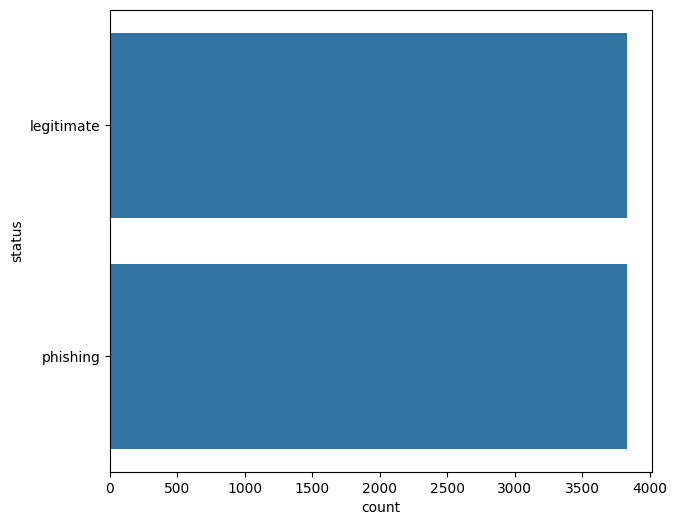

In [37]:
plt.figure(figsize=(7,6))

sns.countplot(data = df['status'])

In [38]:
df['status'].value_counts()

status
legitimate    3829
phishing      3829
Name: count, dtype: int64

In [39]:
data = df.drop(['url'], axis = 1).copy()
data.head()

length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  \
0          82               23   0        2           7      0      0       0   
1          93               14   1        2           0      0      0       0   
2         121               21   1        3           0      0      0       0   
3          24               16   0        2           0      0      0       0   
4          73               24   0        3           1      0      0       0   

   nb_eq  nb_underscore  ...  domain_in_title  domain_with_copyright  \
0      0              0  ...                1                      1   
1      0              0  ...                1                      0   
2      0              0  ...                1                      1   
3      0              0  ...                0                      0   
4      0              5  ...                0                      0   

   whois_registered_domain  domain_registration_length  domain_age  \
0                        0                         240        8892   
1                        1                           0        2996   
2                        0                          30        2527   
3                        0                         139        7531   
4                        0                        3002        7590   

   web_traffic  dns_record  google_index  page_rank      status  
0        67860           0             1          4  legitimate  
1      4189860           0             1          2    phishing  
2       346022           0             1          3    phishing  
3      1059151           0             0          4  legitimate  
4          635           0             1          5  legitimate  

[5 rows x 82 columns]

In [40]:
data['status'] = data['status'].replace({'legitimate': 1, 'phishing': 0})
data.head()


C:\Users\Marcel\AppData\Local\Temp\ipykernel_40004\682200574.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['status'] = data['status'].replace({'legitimate': 1, 'phishing': 0})


length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  \
0          82               23   0        2           7      0      0       0   
1          93               14   1        2           0      0      0       0   
2         121               21   1        3           0      0      0       0   
3          24               16   0        2           0      0      0       0   
4          73               24   0        3           1      0      0       0   

   nb_eq  nb_underscore  ...  domain_in_title  domain_with_copyright  \
0      0              0  ...                1                      1   
1      0              0  ...                1                      0   
2      0              0  ...                1                      1   
3      0              0  ...                0                      0   
4      0              5  ...                0                      0   

   whois_registered_domain  domain_registration_length  domain_age  \
0                        0                         240        8892   
1                        1                           0        2996   
2                        0                          30        2527   
3                        0                         139        7531   
4                        0                        3002        7590   

   web_traffic  dns_record  google_index  page_rank  status  
0        67860           0             1          4       1  
1      4189860           0             1          2       0  
2       346022           0             1          3       0  
3      1059151           0             0          4       1  
4          635           0             1          5       1  

[5 rows x 82 columns]

In [41]:
outliers = {}
for i in range(data.shape[1]):
    zmienna = data[data.columns[i]]
    min_t = zmienna.mean() - (3 * zmienna.std())
    max_t = zmienna.mean() + (3 * zmienna.std())
    count = 0
    for j in zmienna:
        if j < min_t or j > max_t:
            count += 1
    procent = count/df.shape[0]*100
    outliers[data.columns[i]]= round(procent, 2)
print(outliers)

{'length_url': 1.51, 'length_hostname': 0.9, 'ip': 0.0, 'nb_dots': 1.04, 'nb_hyphens': 2.1, 'nb_at': 2.04, 'nb_qm': 0.47, 'nb_and': 1.19, 'nb_eq': 1.25, 'nb_underscore': 1.76, 'nb_tilde': 0.69, 'nb_percent': 1.12, 'nb_slash': 2.0, 'nb_star': 0.08, 'nb_colon': 1.79, 'nb_comma': 0.22, 'nb_semicolumn': 1.44, 'nb_dollar': 0.09, 'nb_space': 0.54, 'nb_www': 0.24, 'nb_com': 0.91, 'nb_dslash': 0.67, 'http_in_path': 1.41, 'https_token': 0.0, 'ratio_digits_url': 2.32, 'ratio_digits_host': 2.45, 'punycode': 0.04, 'port': 0.26, 'tld_in_path': 6.4, 'tld_in_subdomain': 4.92, 'abnormal_subdomain': 2.05, 'nb_subdomains': 0.0, 'prefix_suffix': 0.0, 'random_domain': 8.38, 'shortening_service': 0.0, 'path_extension': 0.03, 'nb_redirection': 1.33, 'nb_external_redirection': 0.37, 'length_words_raw': 1.1, 'char_repeat': 0.74, 'shortest_words_raw': 2.1, 'shortest_word_host': 1.93, 'shortest_word_path': 1.41, 'longest_words_raw': 0.91, 'longest_word_host': 0.99, 'longest_word_path': 0.91, 'avg_words_raw': 1.

In [42]:
outliers_sorted = dict(sorted(outliers.items(), key=lambda item: item[1], reverse=True))

for key, value in outliers_sorted.items():
    print(f"{key}: {value}")

random_domain: 8.38
whois_registered_domain: 7.44
tld_in_path: 6.4
login_form: 6.31
tld_in_subdomain: 4.92
phish_hints: 4.37
ratio_extErrors: 3.56
web_traffic: 3.23
ratio_extRedirection: 2.94
statistical_report: 2.69
ratio_digits_host: 2.45
ratio_digits_url: 2.32
dns_record: 2.12
nb_hyphens: 2.1
shortest_words_raw: 2.1
abnormal_subdomain: 2.05
nb_at: 2.04
nb_slash: 2.0
shortest_word_host: 1.93
suspecious_tld: 1.83
nb_colon: 1.79
nb_underscore: 1.76
nb_hyperlinks: 1.76
avg_word_host: 1.65
domain_registration_length: 1.63
length_url: 1.51
nb_semicolumn: 1.44
http_in_path: 1.41
shortest_word_path: 1.41
nb_redirection: 1.33
nb_eq: 1.25
nb_and: 1.19
nb_percent: 1.12
length_words_raw: 1.1
avg_words_raw: 1.1
nb_dots: 1.04
longest_word_host: 0.99
avg_word_path: 0.99
nb_com: 0.91
longest_words_raw: 0.91
longest_word_path: 0.91
length_hostname: 0.9
char_repeat: 0.74
nb_tilde: 0.69
nb_dslash: 0.67
nb_extCSS: 0.6
popup_window: 0.56
brand_in_path: 0.55
nb_space: 0.54
nb_qm: 0.47
brand_in_subdomain:

In [29]:
data.isnull().sum()
data.info

<bound method DataFrame.info of       nb_hyphens  nb_or  nb_www  nb_redirection  shortest_words_raw  \
0              7      0       1               1                   2   
1              0      0       0               1                   4   
2              0      0       0               3                   1   
3              0      0       1               0                   3   
4              1      0       0               1                   1   
...          ...    ...     ...             ...                 ...   
7653           2      0       1               2                   3   
7654           0      0       0               1                   7   
7655           2      0       0               0                   2   
7656           0      0       1               0                   1   
7657           0      0       0               1                   8   

      domain_in_brand  nb_hyperlinks  ratio_intHyperlinks  \
0                   0            502             0.918

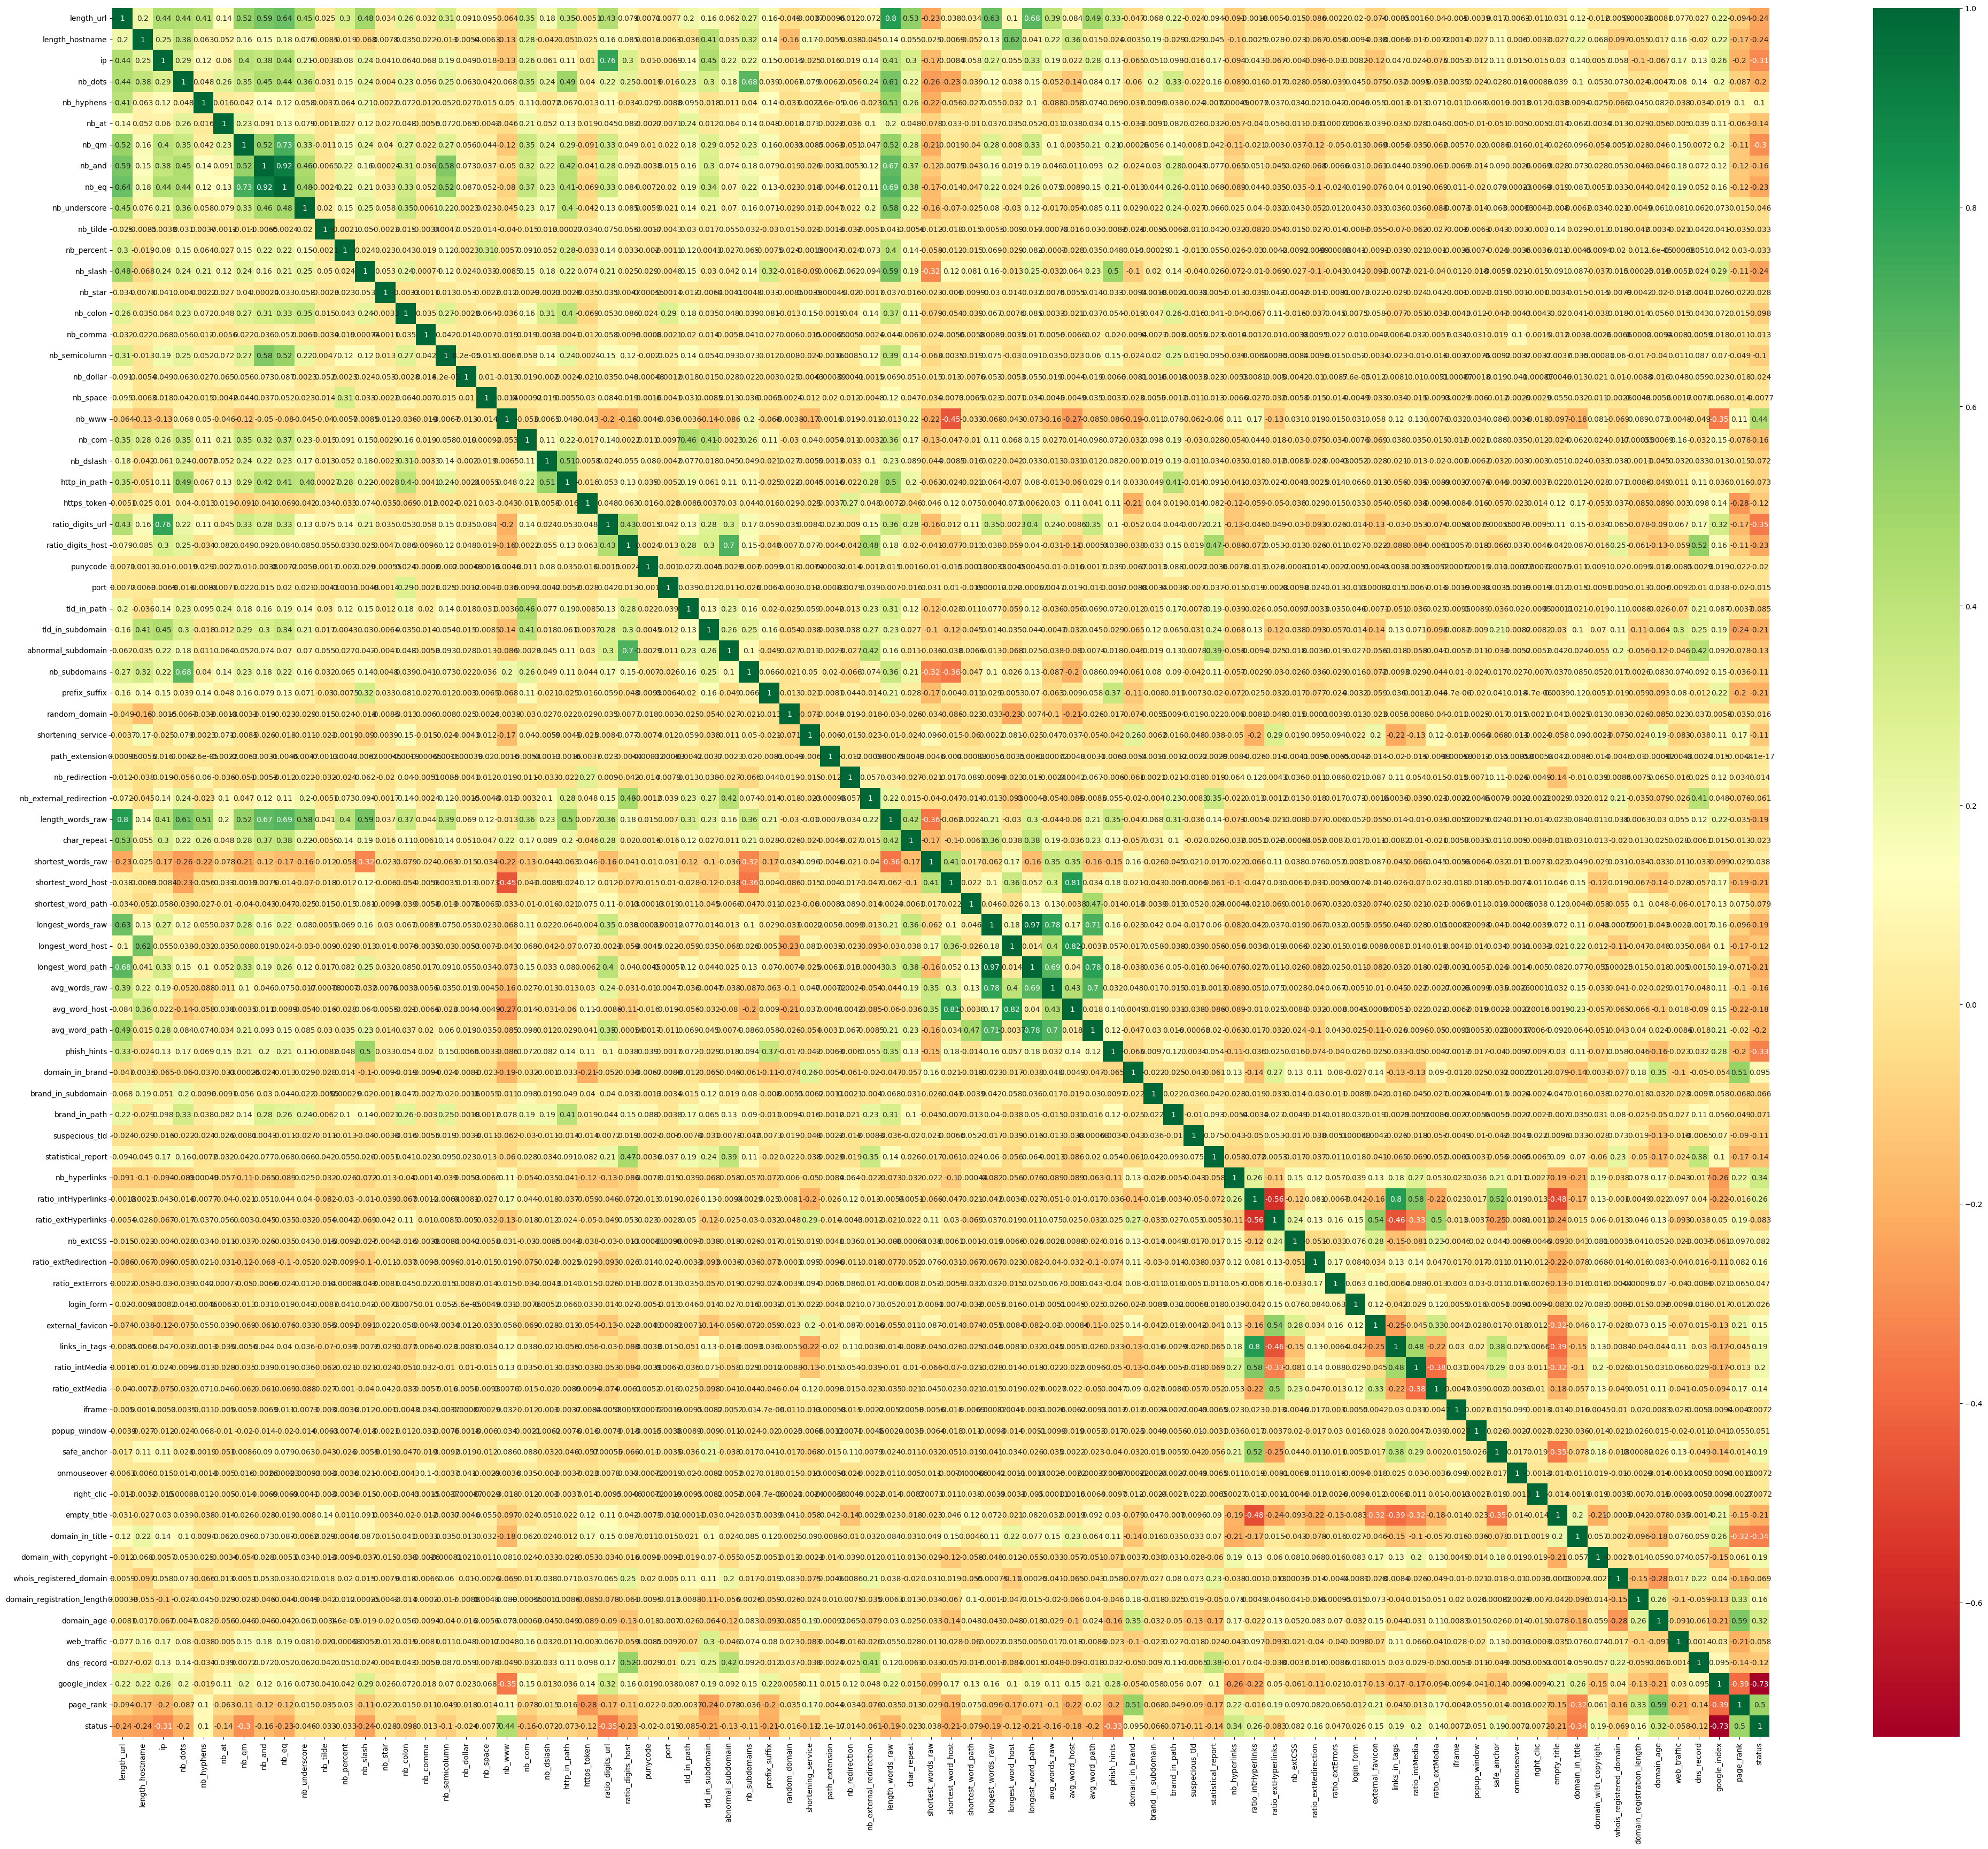

In [43]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50, 42))

g = sns.heatmap(data[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [44]:
col_corr = set() 
def correlation(dataset, threshold):
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
      for j in range(i):
          if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
              colname = corr_matrix.columns[i] 
              col_corr.add(colname)

In [45]:

correlation(data, 0.85)
col_corr

{'longest_word_path', 'nb_eq'}

In [143]:

weak_col = set()
def weakcorrelation(dataset, threshold):
  corr_matrix = dataset.corr()
  idx = 0
  for feature in corr_matrix['status']:
    if(abs(feature) < threshold):
      weak_col.add(corr_matrix.columns[idx])
    idx += 1
  

weakcorrelation(data, 0.1)
print(weak_col)

{'login_form', 'popup_window', 'shortest_words_raw', 'nb_extCSS', 'ratio_extErrors', 'domain_in_brand', 'nb_redirection'}


In [47]:
del_col = col_corr.union(weak_col)
del_col

{'abnormal_subdomain',
 'avg_word_host',
 'avg_word_path',
 'avg_words_raw',
 'brand_in_path',
 'brand_in_subdomain',
 'char_repeat',
 'dns_record',
 'domain_in_title',
 'empty_title',
 'google_index',
 'http_in_path',
 'https_token',
 'iframe',
 'ip',
 'length_hostname',
 'length_url',
 'length_words_raw',
 'longest_word_host',
 'longest_word_path',
 'longest_words_raw',
 'nb_and',
 'nb_at',
 'nb_colon',
 'nb_com',
 'nb_comma',
 'nb_dollar',
 'nb_dots',
 'nb_dslash',
 'nb_eq',
 'nb_external_redirection',
 'nb_percent',
 'nb_qm',
 'nb_semicolumn',
 'nb_slash',
 'nb_space',
 'nb_star',
 'nb_subdomains',
 'nb_tilde',
 'nb_underscore',
 'onmouseover',
 'path_extension',
 'phish_hints',
 'port',
 'prefix_suffix',
 'punycode',
 'random_domain',
 'ratio_digits_host',
 'ratio_digits_url',
 'ratio_extHyperlinks',
 'right_clic',
 'shortening_service',
 'shortest_word_host',
 'shortest_word_path',
 'statistical_report',
 'suspecious_tld',
 'tld_in_path',
 'tld_in_subdomain',
 'web_traffic',
 'wh

In [48]:
data.drop(del_col, axis = 1, inplace = True)


In [49]:
data_resampled = data.sample(frac=1).reset_index(drop=True)
data_resampled.head()

nb_hyphens  nb_www  nb_redirection  shortest_words_raw  domain_in_brand  \
0           4       1               1                   3                0   
1           1       1               0                   3                0   
2           6       1               4                   2                1   
3           1       0               1                   3                0   
4           1       0               1                   2                0   

   nb_hyperlinks  ratio_intHyperlinks  nb_extCSS  ratio_extRedirection  \
0            304             0.914474          2              0.230769   
1             51             0.705882          1              0.066667   
2            377             0.986737          0              0.200000   
3             87             0.988506          0              0.000000   
4             51             1.000000          0              0.000000   

   ratio_extErrors  ...  links_in_tags  ratio_intMedia  ratio_extMedia  \
0         0.307692  ...      93.670886       55.555556       44.444444   
1         0.066667  ...      40.000000        0.000000      100.000000   
2         0.200000  ...     100.000000      100.000000        0.000000   
3         1.000000  ...     100.000000       87.500000       12.500000   
4         0.000000  ...     100.000000      100.000000        0.000000   

   popup_window  safe_anchor  domain_with_copyright  \
0             0    15.384615                      0   
1             0    55.555556                      0   
2             0    91.803279                      0   
3             0   100.000000                      1   
4             0   100.000000                      1   

   domain_registration_length  domain_age  page_rank  status  
0                         363        5115          4       1  
1                        2370        7856          4       1  
2                         668       11021          6       1  
3                          68        7967          1       0  
4                           0        3993          0       0  

[5 rows x 22 columns]

In [50]:


X = data_resampled.drop(columns=["status"])
y = data_resampled["status"]

In [51]:
X.head()

nb_hyphens  nb_www  nb_redirection  shortest_words_raw  domain_in_brand  \
0           4       1               1                   3                0   
1           1       1               0                   3                0   
2           6       1               4                   2                1   
3           1       0               1                   3                0   
4           1       0               1                   2                0   

   nb_hyperlinks  ratio_intHyperlinks  nb_extCSS  ratio_extRedirection  \
0            304             0.914474          2              0.230769   
1             51             0.705882          1              0.066667   
2            377             0.986737          0              0.200000   
3             87             0.988506          0              0.000000   
4             51             1.000000          0              0.000000   

   ratio_extErrors  ...  external_favicon  links_in_tags  ratio_intMedia  \
0         0.307692  ...                 1      93.670886       55.555556   
1         0.066667  ...                 1      40.000000        0.000000   
2         0.200000  ...                 0     100.000000      100.000000   
3         1.000000  ...                 0     100.000000       87.500000   
4         0.000000  ...                 0     100.000000      100.000000   

   ratio_extMedia  popup_window  safe_anchor  domain_with_copyright  \
0       44.444444             0    15.384615                      0   
1      100.000000             0    55.555556                      0   
2        0.000000             0    91.803279                      0   
3       12.500000             0   100.000000                      1   
4        0.000000             0   100.000000                      1   

   domain_registration_length  domain_age  page_rank  
0                         363        5115          4  
1                        2370        7856          4  
2                         668       11021          6  
3                          68        7967          1  
4                           0        3993          0  

[5 rows x 21 columns]

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [53]:
# Normalizacja cech
X = (X - X.min())/(X.max() - X.min())
X

nb_hyphens  nb_www  nb_redirection  shortest_words_raw  domain_in_brand  \
0        0.12500     0.5        0.166667            0.066667              0.0   
1        0.03125     0.5        0.000000            0.066667              0.0   
2        0.18750     0.5        0.666667            0.033333              1.0   
3        0.03125     0.0        0.166667            0.066667              0.0   
4        0.03125     0.0        0.166667            0.033333              0.0   
...          ...     ...             ...                 ...              ...   
7653     0.00000     0.0        0.000000            0.033333              0.0   
7654     0.09375     0.0        0.166667            0.033333              0.0   
7655     0.06250     0.0        0.000000            0.066667              0.0   
7656     0.00000     0.0        0.000000            0.066667              0.0   
7657     0.03125     0.0        0.166667            0.033333              0.0   

      nb_hyperlinks  ratio_intHyperlinks  nb_extCSS  ratio_extRedirection  \
0          0.065250             0.914474   0.016129              0.115385   
1          0.010947             0.705882   0.008065              0.033333   
2          0.080919             0.986737   0.000000              0.100000   
3          0.018674             0.988506   0.000000              0.000000   
4          0.010947             1.000000   0.000000              0.000000   
...             ...                  ...        ...                   ...   
7653       0.000000             0.000000   0.000000              0.000000   
7654       0.003005             0.357143   0.000000              0.166667   
7655       0.002146             0.300000   0.016129              0.071429   
7656       0.006868             0.125000   0.016129              0.250000   
7657       0.010947             1.000000   0.000000              0.000000   

      ratio_extErrors  ...  external_favicon  links_in_tags  ratio_intMedia  \
0            0.307692  ...               1.0       0.936709        0.555556   
1            0.066667  ...               1.0       0.400000        0.000000   
2            0.200000  ...               0.0       1.000000        1.000000   
3            1.000000  ...               0.0       1.000000        0.875000   
4            0.000000  ...               0.0       1.000000        1.000000   
...               ...  ...               ...            ...             ...   
7653         0.000000  ...               0.0       0.000000        0.000000   
7654         0.000000  ...               0.0       1.000000        0.000000   
7655         0.000000  ...               1.0       0.000000        1.000000   
7656         0.214286  ...               1.0       0.000000        0.000000   
7657         0.000000  ...               0.0       1.000000        1.000000   

      ratio_extMedia  popup_window  safe_anchor  domain_with_copyright  \
0           0.444444           0.0     0.153846                    0.0   
1           1.000000           0.0     0.555556                    0.0   
2           0.000000           0.0     0.918033                    0.0   
3           0.125000           0.0     1.000000                    1.0   
4           0.000000           0.0     1.000000                    1.0   
...              ...           ...          ...                    ...   
7653        0.000000           0.0     0.000000                    0.0   
7654        0.000000           0.0     0.357143                    0.0   
7655        0.000000           0.0     0.000000                    0.0   
7656        1.000000           0.0     0.066667                    1.0   
7657        0.000000           0.0     1.000000                    1.0   

      domain_registration_length  domain_age  page_rank  
0                       0.012202    0.397874        0.4  
1                       0.079484    0.610585        0.4  
2                       0.022427    0.856201        0.6  
3                       0.002313    0.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [55]:
from sklearn.linear_model import LogisticRegression

In [63]:
lgr = LogisticRegression(random_state=0)
lgr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [64]:
y_pre_test = lgr.predict(X_test)
y_pre_train = lgr.predict(X_train)

In [65]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(y_pre_train, y_train)
test_accurry = accuracy_score(y_pre_test, y_test)
print('Accuracy for train dataset for logistic reg : ', train_accurry)
print('Accuracy for test dataset for logistic reg : ', test_accurry)

Accuracy for train dataset for logistic reg :  0.8560235063663075
Accuracy for test dataset for logistic reg :  0.8387728459530026


In [66]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pre_test ))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       773
           1       0.82      0.86      0.84       759

    accuracy                           0.84      1532
   macro avg       0.84      0.84      0.84      1532
weighted avg       0.84      0.84      0.84      1532



In [67]:
confusion_matrix(y_test, y_pre_test )

array([[633, 140],
       [107, 652]], dtype=int64)

<Axes: >

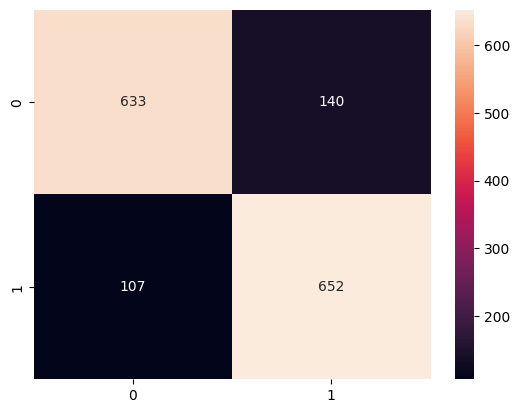

In [68]:
sns.heatmap(confusion_matrix(y_test,y_pre_test), annot = True, fmt='0.0f')

## Decision tree

In [108]:

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [114]:

tree = DecisionTreeClassifier()


tree = tree.fit(X_train,y_train)


y_pred = tree.predict(X_test)

In [115]:
tree.score(X_train, y_train)

1.0

In [112]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8851174934725848


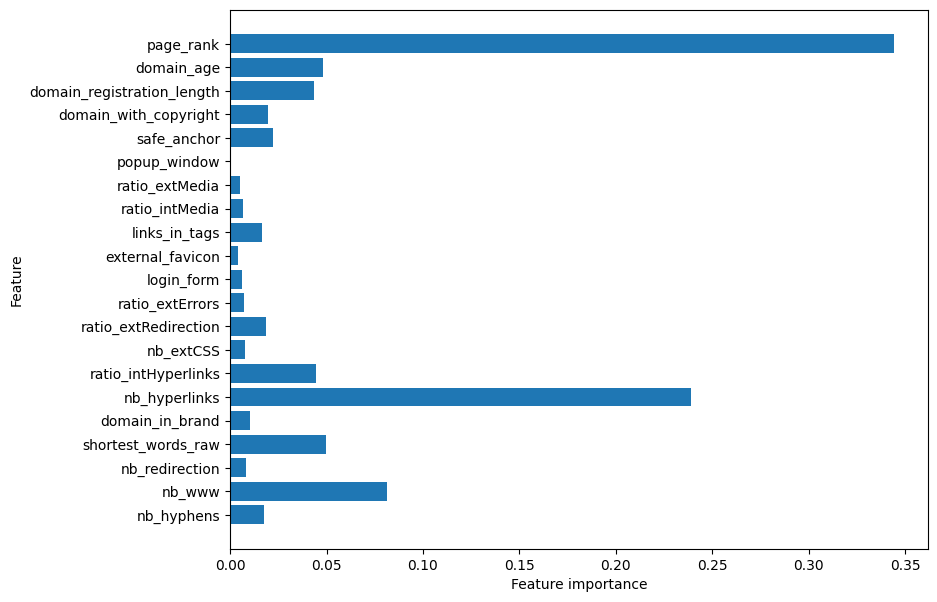

In [116]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [75]:

y_pred = rfc.predict(X_test)

In [76]:

y_pred_train = rfc.predict(X_train)

In [77]:
from sklearn import metrics
print("Train ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train, y_pred_train))

Train ACCURACY OF THE MODEL:  1.0


In [78]:
from sklearn import metrics
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9342036553524804


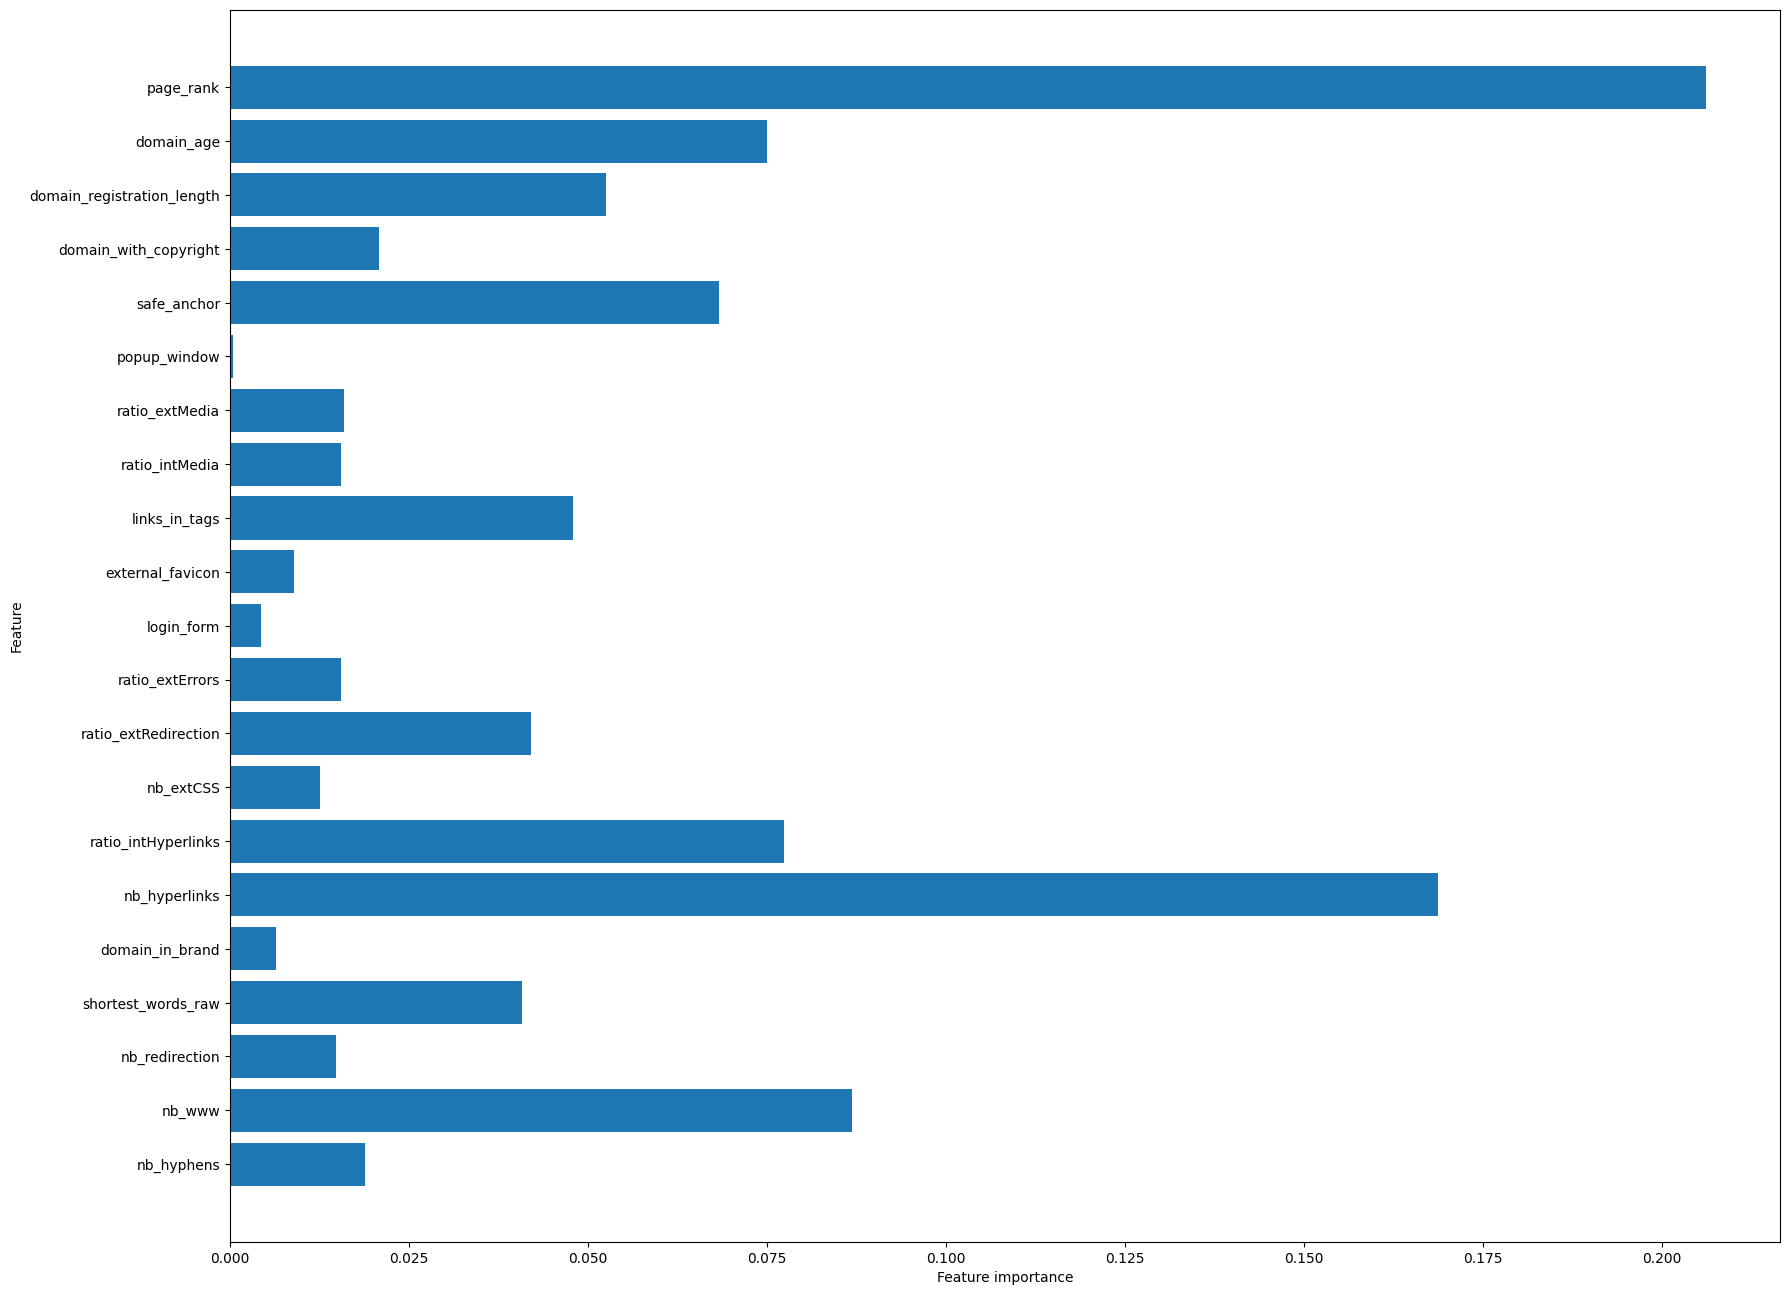

In [117]:
plt.figure(figsize=(20,16))
n_features = X_train.shape[1]
plt.barh(range(n_features), rfc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [79]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       962
           1       0.94      0.93      0.93       953

    accuracy                           0.93      1915
   macro avg       0.93      0.93      0.93      1915
weighted avg       0.93      0.93      0.93      1915



In [80]:
confusion_matrix(y_test, y_pred)

array([[901,  61],
       [ 65, 888]], dtype=int64)

<Axes: >

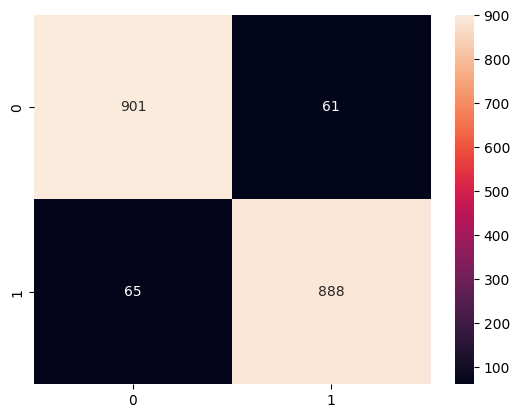

In [81]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='0.0f')

## SVM

In [82]:
from sklearn.svm import SVC

svc_model = SVC(C= .1, gamma= 1, kernel='sigmoid', random_state=42)

In [83]:
svc_model.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='sigmoid', random_state=42)

In [84]:
prediction = svc_model .predict(X_test)

print('Accuracy of training data: ', svc_model.score(X_train, y_train))
print('Accuracy of validation data: ',svc_model.score(X_test, y_test))

Accuracy of training data:  0.32056416507052066
Accuracy of validation data:  0.3268929503916449


In [85]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.33      0.34      0.34       962
           1       0.32      0.32      0.32       953

    accuracy                           0.33      1915
   macro avg       0.33      0.33      0.33      1915
weighted avg       0.33      0.33      0.33      1915



In [86]:
confusion_matrix(y_test, prediction)

array([[325, 637],
       [652, 301]], dtype=int64)

<Axes: >

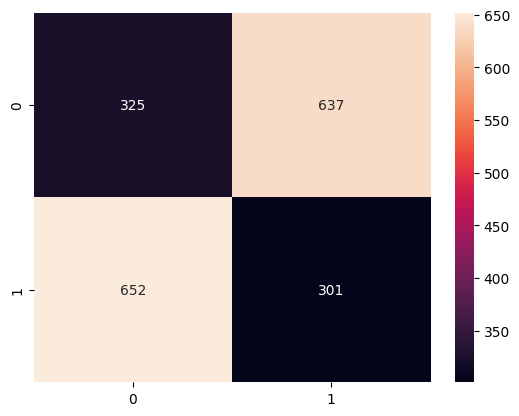

In [87]:
sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='0.0f')

## K-nearest neighbors

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#### choosing the best values of k (neighbours)

In [89]:
neighbour = []
accuracy = []
for k in range(1, 20):
  k_near = KNeighborsClassifier(n_neighbors=k)
  k_near.fit(X,y)
  Y_pre_test = k_near.predict(X_test)
  Y_pre_train = k_near.predict(X_train)
  test_accurry = accuracy_score(Y_pre_test, y_test)
  neighbour.append(k)
  accuracy.append(test_accurry)

Text(0, 0.5, 'accuracy')

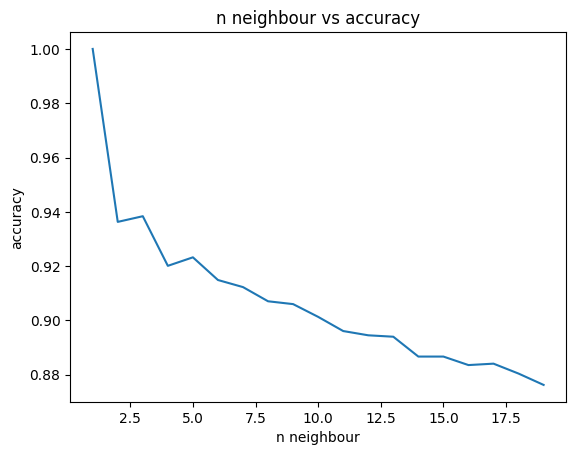

In [90]:

plt.plot(neighbour, accuracy)
plt.title('n neighbour vs accuracy')
plt.xlabel('n neighbour')
plt.ylabel('accuracy')

#### KNN with n_neighbour = 1 

In [91]:
k_near = KNeighborsClassifier(n_neighbors=1)
k_near.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [92]:
Y_pre_test = k_near.predict(X_test)
Y_pre_train = k_near.predict(X_train)

In [93]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(Y_pre_train, y_train)
test_accurry = accuracy_score(Y_pre_test, y_test)
print('Accuracy for train dataset for K-neariest : ', train_accurry)
print('Accuracy for test dataset for K-neariest : ', test_accurry)

Accuracy for train dataset for K-neariest :  1.0
Accuracy for test dataset for K-neariest :  0.8830287206266318


In [94]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, Y_pre_test ))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       962
           1       0.90      0.86      0.88       953

    accuracy                           0.88      1915
   macro avg       0.88      0.88      0.88      1915
weighted avg       0.88      0.88      0.88      1915



In [95]:
confusion_matrix(y_test, Y_pre_test )

array([[867,  95],
       [129, 824]], dtype=int64)

<Axes: >

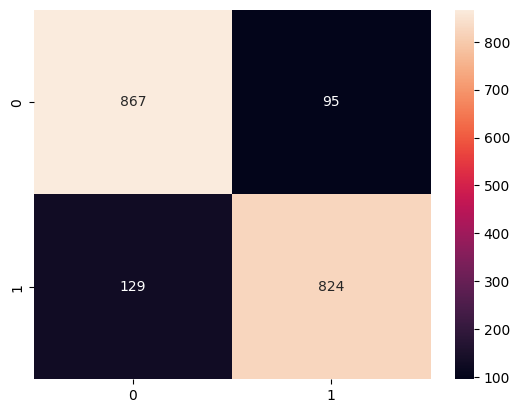

In [96]:
sns.heatmap(confusion_matrix(y_test, Y_pre_test), annot = True, fmt='0.0f')

## Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB, ComplementNB

In [99]:

nvb = BernoulliNB()
nvb.fit(X_train,y_train)

BernoulliNB()

In [103]:
y_pre_test = nvb.predict(X_test)
y_pre_train = nvb.predict(X_train)

In [104]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(y_pre_train, y_train)
test_accurry = accuracy_score(y_pre_test, y_test)
print('Accuracy for train dataset for naive bayes  reg : ', train_accurry)
print('Accuracy for test dataset for naive bayes reg : ', test_accurry)

Accuracy for train dataset for naive bayes  reg :  0.8011492251436532
Accuracy for test dataset for naive bayes reg :  0.804177545691906


In [105]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pre_test ))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       962
           1       0.77      0.86      0.81       953

    accuracy                           0.80      1915
   macro avg       0.81      0.80      0.80      1915
weighted avg       0.81      0.80      0.80      1915



In [106]:
confusion_matrix(y_test, y_pre_test)

array([[722, 240],
       [135, 818]], dtype=int64)

<Axes: >

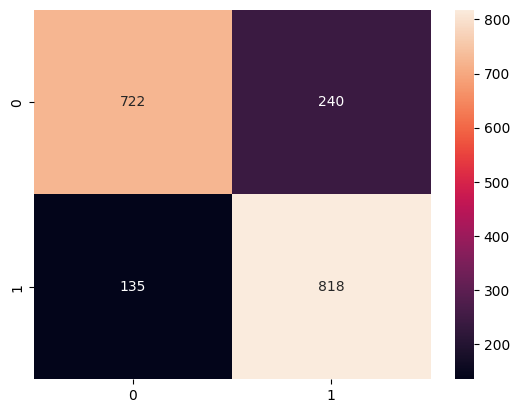

In [107]:
sns.heatmap(confusion_matrix(y_test, y_pre_test), annot = True, fmt='0.0f')

In [118]:

from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

mlp.fit(X_train, y_train)

c:\Users\Marcel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [125]:
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [128]:
acc_train_mlp = accuracy_score(y_train, y_train_mlp)
acc_test_mlp = accuracy_score(y_test, y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.985
Multilayer Perceptrons: Accuracy on test Data: 0.903
